### K-Nearest Neighbor Algorithmus:

#### Parameter:  

dataset = (X, Y)  
mit X := Features  
und Y := Classes  

K := Hyperparameter für die nächsten k Nachbarn  
sample := Neuer Datenpunkt zum Klassifizieren 

#### Pseudo-Code:

kNN (dataset, K, sample):  
  - Bestimme von jedem Punkt $p \in dataset$ die Distanz, mit der geg. Distanzfunktion.
  - Bestimme die $K$ nächst gelegenen Nachbarn und bestimme die zugehörige Klasse von $sample$.  

In [14]:
import numpy as np

def generate_dataset():
    cov = np.array([[1, 0], [0, 1]])
    data1 = np.random.multivariate_normal(np.array([0, 0]), cov, 10)
    data2 = np.random.multivariate_normal(np.array([-10, 4]), cov, 6)
    data3 = np.random.multivariate_normal(np.array([10, 10]), cov, 13)
    data = np.concatenate((data1, data2, data3), axis=0)
    classes = np.array([0 for i in range(10)] + [1 for i in range(6)] + [2 for i in range(13)])
    return data, classes

In [15]:
dataset, classes = generate_dataset()

In [16]:
print(dataset.shape)
print(classes.shape)

print("Datase, Classes")
print(dataset)
print(classes)

(29, 2)
(29,)
Datase, Classes
[[ -0.89766912   0.09928077]
 [  0.21273642  -1.12849941]
 [ -0.78076564  -0.8308987 ]
 [  0.42688923  -1.87466279]
 [  0.69373061  -1.35786477]
 [  0.47611766   1.32300398]
 [ -0.23095661  -0.66205827]
 [ -0.18583675   1.39178151]
 [  0.87817892  -0.30048506]
 [ -0.16934706   0.4188005 ]
 [ -9.09840938   4.70117132]
 [ -9.45518284   2.60597208]
 [-10.16333228   5.26565937]
 [ -9.99885308   3.86371304]
 [ -9.25147829   4.79688495]
 [-11.209517     3.96814632]
 [ 11.10894924   9.14165385]
 [  9.41585599   9.90055144]
 [  9.42244299  10.76218492]
 [ 10.24266236  10.50708751]
 [  9.23000526   8.41656819]
 [  9.73409092   9.37328005]
 [ 10.5229492   11.40834075]
 [ 10.21273978   9.70289103]
 [ 10.46206808   9.82536519]
 [  8.6559298   10.36718164]
 [ 10.16276029  10.69595814]
 [  9.97909798  10.38887223]
 [  9.6295481    8.20278571]]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [17]:
import matplotlib.pyplot as plt

def plot_dataset(dataset, classes):
    colors = ["red", "blue", "green"]
    for index, point in enumerate(dataset):
        plt.scatter(point[0], point[1], color=colors[classes[index]])
    plt.show()

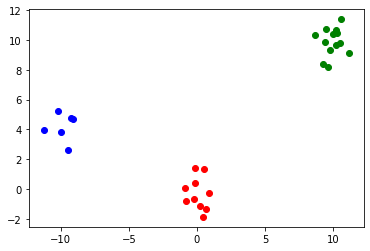

In [18]:
plot_dataset(dataset, classes)

### KNN Implementation

In [19]:
class KNeighborsClassifier:
    def __init__(self, n_neighbors: int = 5):
        self.n_neighbors = n_neighbors
        self.X = None
        self.y = None
        self.num_classes = None
        self.num_features = None
    
    def _distance(self, p1: np.ndarray, p2: np.ndarray):
        return np.linalg.norm(p1 - p2)
    
    def kneighbors(self, X: np.ndarray):
        neighbors = [
            sorted([(self._distance(p, x_i), idx) for idx, x_i in enumerate(self.X)],key=lambda x: x[0])[:self.n_neighbors] for p in X
        ]
        neighbor_idxs = np.array(
                [[neighbor_point[1] for neighbor_point in neighbor_points] for neighbor_points in neighbors],
                dtype=np.int
            )
        return neighbor_idxs
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        self.X = X
        self.num_features = self.X.shape[1]
        self.y = y
        self.num_classes = len(np.unique(self.y))
    
    def _vote_class(self, neighbor_idxs: np.ndarray):
        votes = np.array([0 for class_idx in range(self.num_classes)])
        for neighbor_idx in neighbor_idxs:
            neighbor_class = self.y[neighbor_idx]
            votes[neighbor_class] += 1
        voted_class = np.argmax(votes)
        return voted_class
    
    def predict(self, X: np.ndarray):
        neighbor_idxs = self.kneighbors(X)
        y_pred = np.array([self._vote_class(neighbor_idx) for neighbor_idx in neighbor_idxs])
        return y_pred
    
    def score(self, X: np.ndarray, y: np.ndarray):
        y_pred = self.predict(X)
        accuracy = np.sum([y_pred_i == y_i for y_pred_i, y_i in zip(y_pred, y)]) / len(y)
        return accuracy

In [20]:
X = dataset
y = classes

x_test = np.array([[0, 4]])
y_test = np.array([0])

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)

neighbors = clf.kneighbors(x_test)
print(f"NeighborIdxs:\n{neighbors}")
print(f"NeighborPoints:\n{X[neighbors]}")
print(f"NeighborClasses:\n{y[neighbors]}")

print(f"TestSamples:\n{x_test}")
print(f"Pred:\n{clf.predict(x_test)}")
print(f"Score:\n{clf.score(x_test, y_test)}")

NeighborIdxs:
[[7 5 9]]
NeighborPoints:
[[[-0.18583675  1.39178151]
  [ 0.47611766  1.32300398]
  [-0.16934706  0.4188005 ]]]
NeighborClasses:
[[0 0 0]]
TestSamples:
[[0 4]]
Pred:
[0]
Score:
1.0


In [21]:
def plot_knn_prediction(clf, samples):
    colors = ["red", "blue", "green"]
    for index, point in enumerate(dataset):
        plt.scatter(point[0], point[1], color=colors[classes[index]])
    neighbor_idxs = clf.kneighbors(samples)
    neighbor_points = clf.X[neighbor_idxs]
    for idx, sample in enumerate(samples):
        plt.scatter(sample[0], sample[1], color="yellow")
        for neighbor_point in neighbor_points[idx]:
            plt.plot((neighbor_point[0], sample[0]), (neighbor_point[1], sample[1]), color="cyan")
    plt.show()

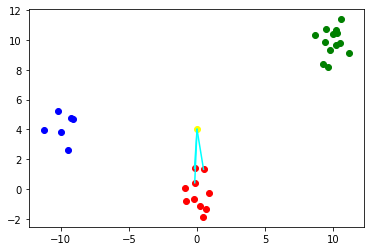

In [22]:
plot_knn_prediction(clf, x_test)